In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
read = pd.read_feather(".\\stats\\parameter_scenarios.feather")
read = read[(read['depart'] >= 500) & (read['depart'] <= 3500)]

In [3]:
read.groupby(["alpha", "beta", "gamma"])['timeLoss'].mean().idxmin()

(4.0, 0.20000000000000018, 1.6)

In [4]:
read.groupby(["alpha", "beta", "gamma"])['waitingTime'].mean().idxmin()

(5.0, 0.8, 2.0)

In [ ]:
read["speed"] = read["routeLength"] / read["duration"]

In [93]:
read.groupby(["alpha", "beta", "gamma"])['speed'].mean().idxmax()

(7.0, 0.40000000000000013, 0.6000000000000003)

In [17]:
timeLoss = read.groupby(["alpha", "beta", "gamma"])['timeLoss'].mean().reset_index(level=['alpha', 'beta', 'gamma'])
waitingTime = read.groupby(["alpha", "beta", "gamma"])['waitingTime'].mean().reset_index(level=['alpha', 'beta', 'gamma'])
speed = read.groupby(["alpha", "beta", "gamma"])['speed'].mean().reset_index(level=['alpha', 'beta', 'gamma'])

In [38]:
timeLoss = timeLoss.apply(lambda x: round(x, 2))
waitingTime = waitingTime.apply(lambda x: round(x, 2))
speed = speed.apply(lambda x: round(x, 2))

In [89]:
timeLoss_range = [timeLoss.timeLoss.min(), timeLoss.timeLoss.max()]
waitingTime_range = [waitingTime.waitingTime.min(), waitingTime.waitingTime.max()]
speed_range = [speed.speed.min(), speed.speed.max()]

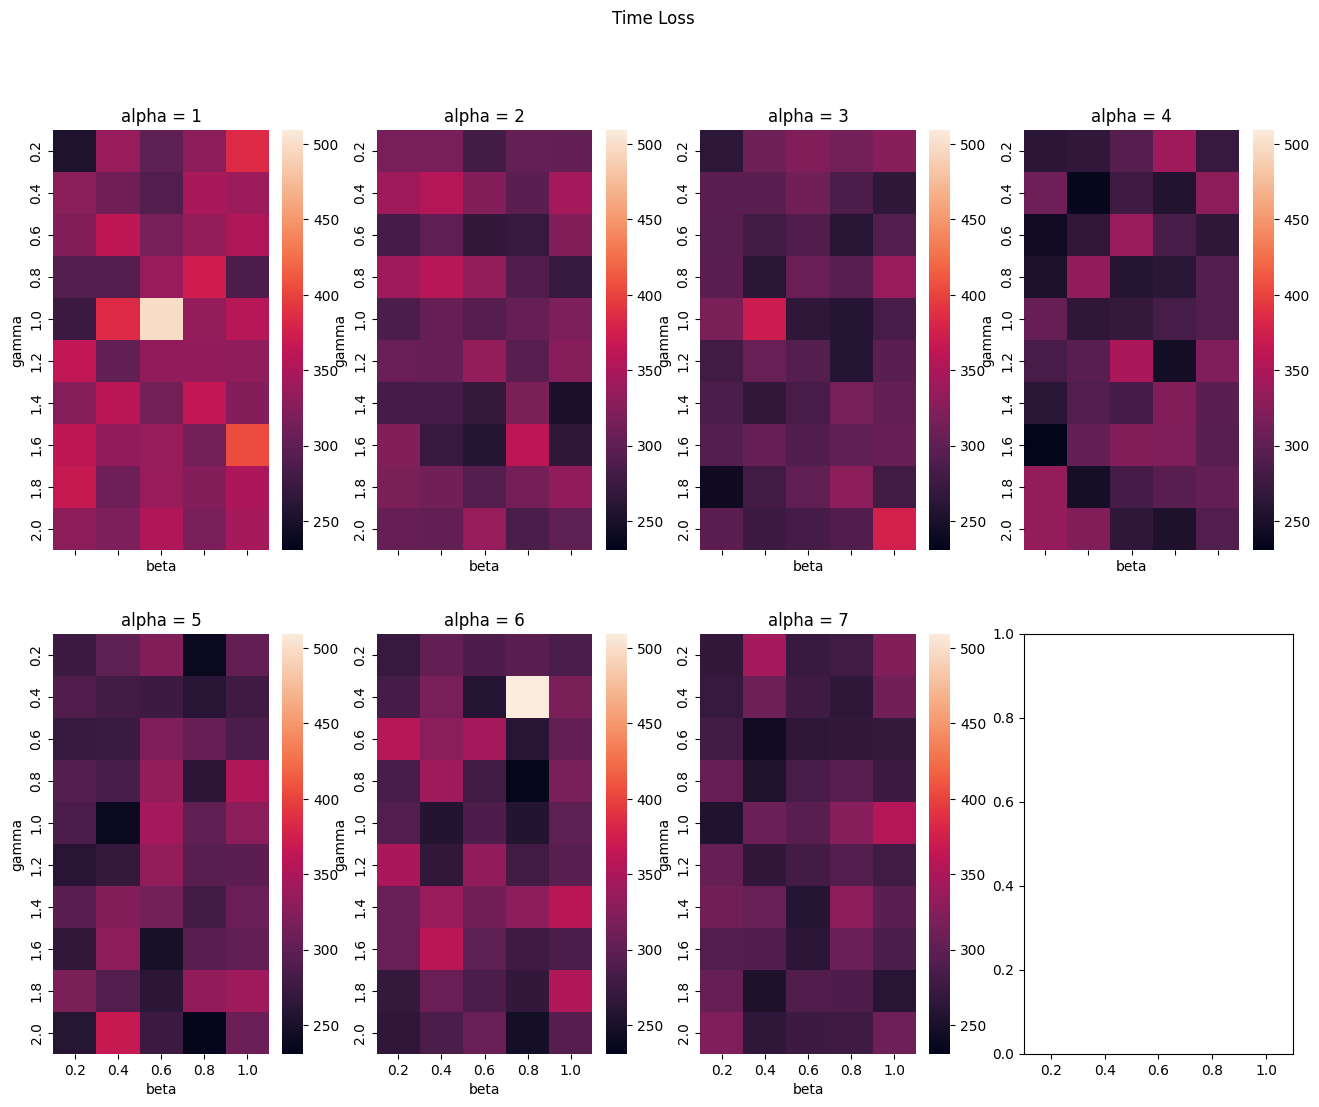

In [90]:
figure, axes = plt.subplots(2, 4, sharex=True,figsize=(16,12))
figure.suptitle('Time Loss')

for i in range(1, 5):
    df = (timeLoss[(timeLoss['alpha'] == i)]).reset_index().pivot(columns='beta',index='gamma',values='timeLoss')
    sns.heatmap(df, ax=axes[0, i-1], vmin=timeLoss_range[0], vmax=timeLoss_range[1]).set(title="alpha = {}".format(i))

for i in range(1, 4):
    df1 = (timeLoss[(timeLoss['alpha'] == i+4)]).reset_index().pivot(columns='beta',index='gamma',values='timeLoss')
    sns.heatmap(df1, ax=axes[1, i-1], vmin=timeLoss_range[0], vmax=timeLoss_range[1]).set(title="alpha = {}".format(i+4))

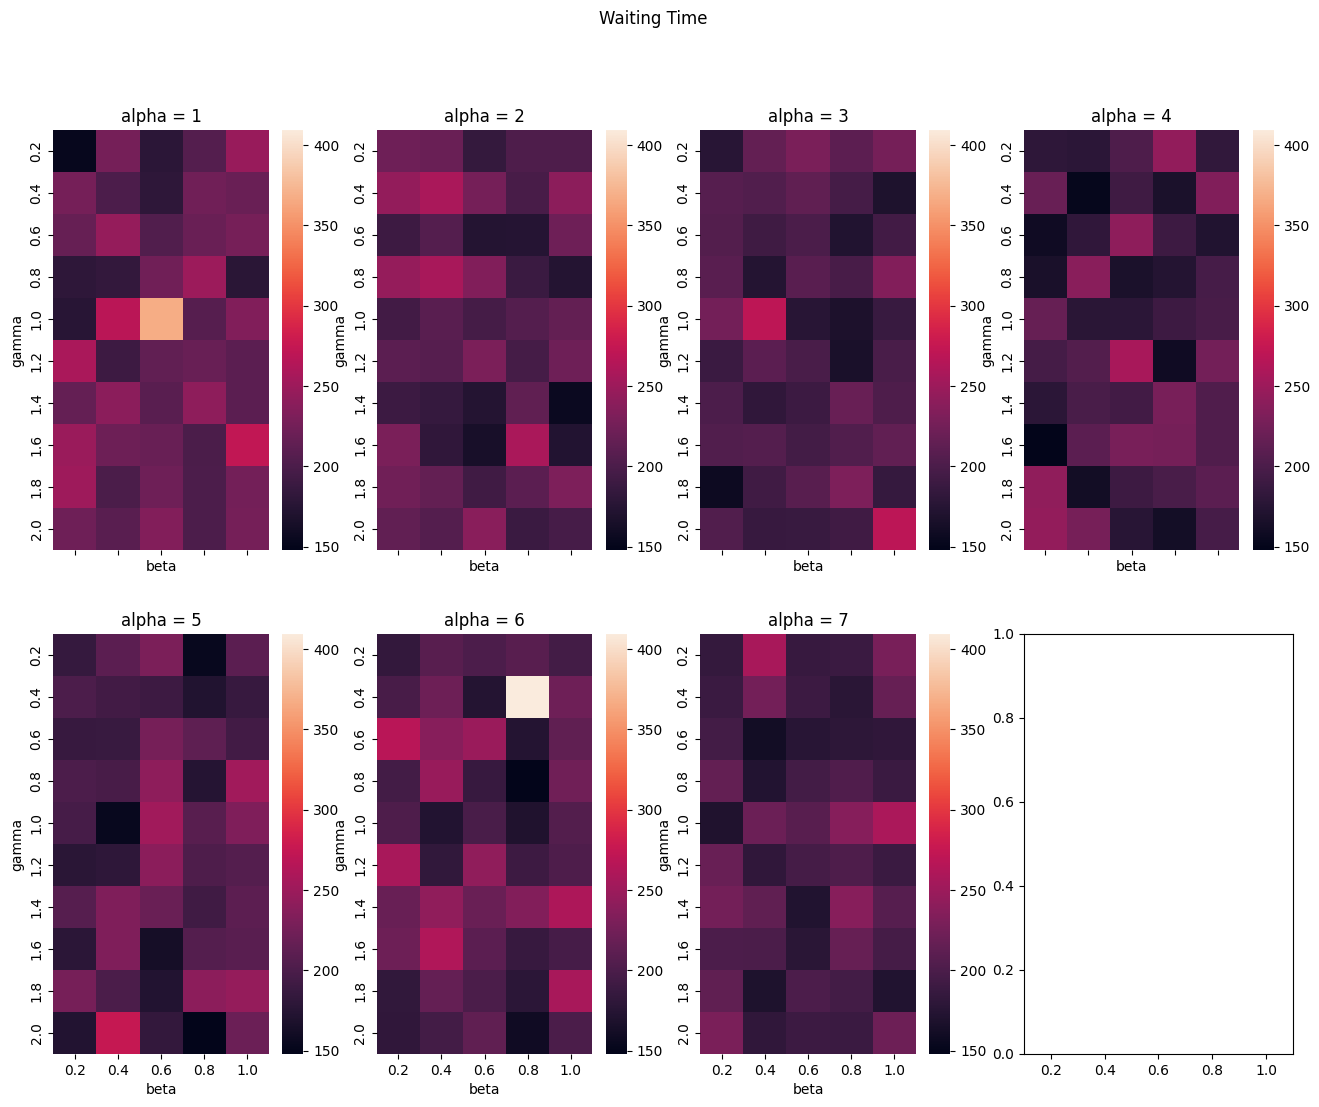

In [91]:
figure, axes = plt.subplots(2, 4, sharex=True,figsize=(16,12))
figure.suptitle('Waiting Time')

for i in range(1, 5):
    df = (waitingTime[(waitingTime['alpha'] == i)]).reset_index().pivot(columns='beta',index='gamma',values='waitingTime')
    sns.heatmap(df, ax=axes[0, i-1], vmin=waitingTime_range[0], vmax=waitingTime_range[1]).set(title="alpha = {}".format(i))

for i in range(1, 4):
    df = (waitingTime[(waitingTime['alpha'] == i+4)]).reset_index().pivot(columns='beta',index='gamma',values='waitingTime')
    sns.heatmap(df, ax=axes[1, i-1], vmin=waitingTime_range[0], vmax=waitingTime_range[1]).set(title="alpha = {}".format(i+4))

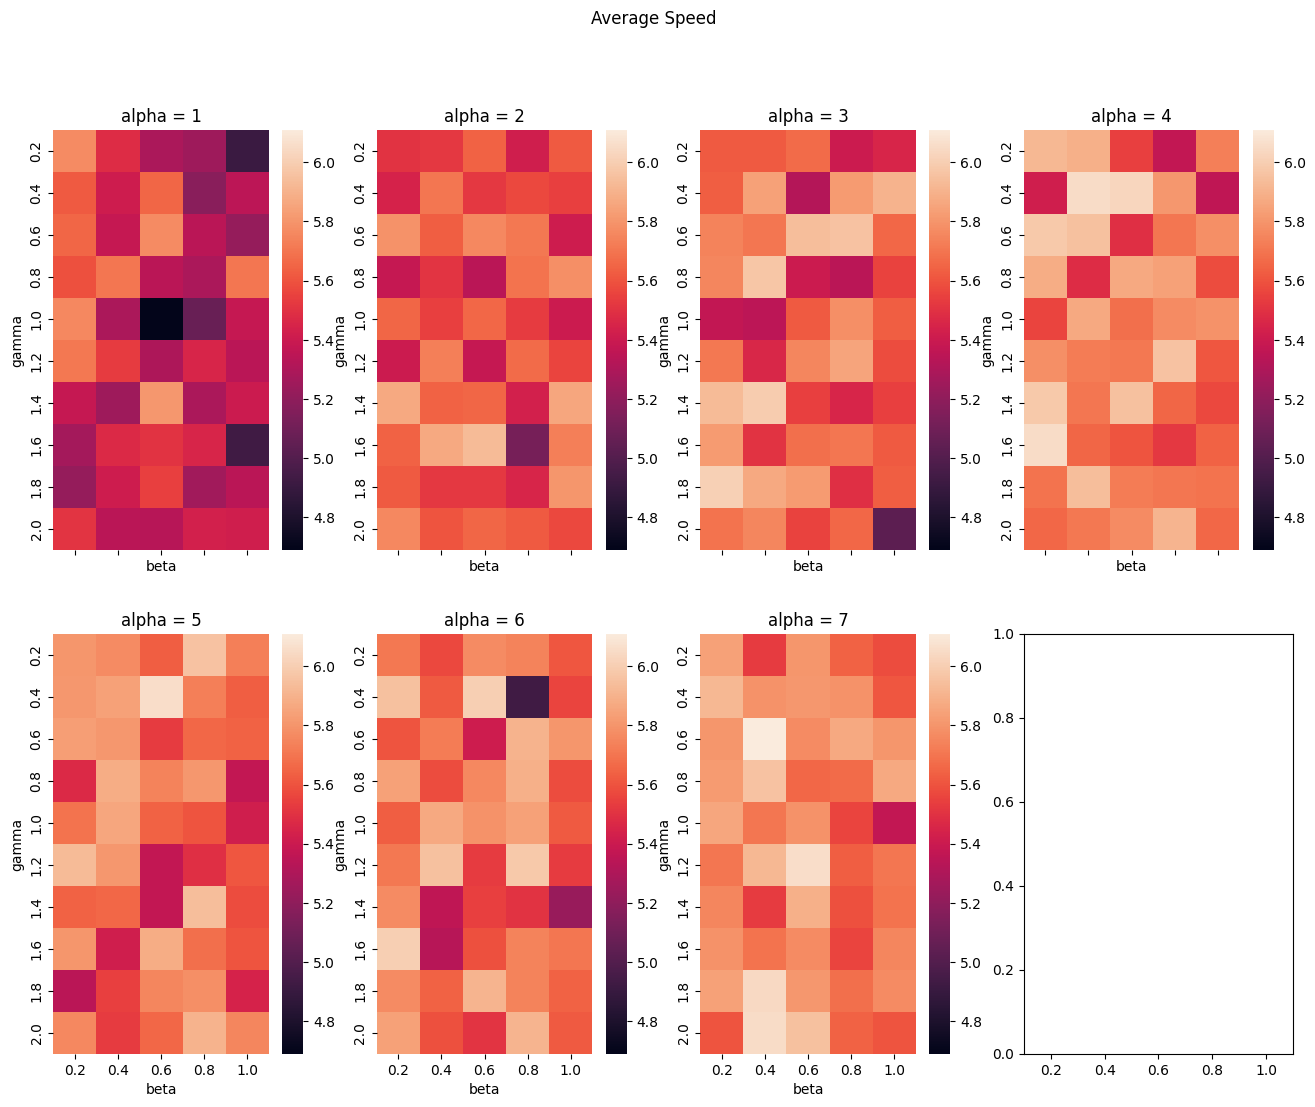

In [92]:
figure, axes = plt.subplots(2, 4, sharex=True,figsize=(16,12))
figure.suptitle('Average Speed')

for i in range(1, 5):
    df = (speed[(speed['alpha'] == i)]).reset_index().pivot(columns='beta',index='gamma',values='speed')
    sns.heatmap(df, ax=axes[0, i-1], vmin=speed_range[0], vmax=speed_range[1]).set(title="alpha = {}".format(i))

for i in range(1, 4):
    df = (speed[(speed['alpha'] == i+4)]).reset_index().pivot(columns='beta',index='gamma',values='speed')
    sns.heatmap(df, ax=axes[1, i-1], vmin=speed_range[0], vmax=speed_range[1]).set(title="alpha = {}".format(i+4))